In [2]:
import os
import json
from deta import Deta
import pandas as pd
import numpy as np
from datetime import datetime
from dotenv import load_dotenv
from IPython.display import Image
# from PIL import Image

### Load DB key

In [3]:
load_dotenv("expense_tracker_app/.env")
DETA_KEY = os.getenv("DETA_KEY")

### Initialize DB

In [26]:
deta = Deta(DETA_KEY)
db = deta.Base("defects_db")
drive = deta.Drive("defects_imgs")

### DB functions

In [5]:
def upload_data(image_data, defect_type, details):
    date_time = datetime.now()
    date = date_time.strftime("%m/%d/%Y")
    time = date_time.strftime("%H:%M:%S")
    return db.put({"key": str(date_time.timestamp()), "date": date, "time": time, "image_data": image_data, "defect_type": defect_type, "details": details})

def fetch_data(period):
    return db.get(period)

def fetch_all_data():
    res = db.fetch()
    return res.items

### Example data & upload

In [6]:
# image_data = "new-img"
# defect_type = "Slubs"
# details = {'PO': 'P0X-2929', 'K1': '13200046', 'Qty': 300}
# upload_data(image_data, defect_type, details)

In [27]:
defects_data = fetch_all_data()
df = pd.DataFrame(defects_data)
df

,Article,Customer,Date,Defect_type,PO,Quantity,Remarks,key
0,A121A041,Uniqlo,10-07-2023,Leno break,F010225085,2442,Tight leno on both sides. Updated to MSML - Go...,1689357575.939281
1,A140F896,Aathava,10-07-2023,Droppings,"FMW0003706, F010225309",8600,Updated to MSML. Rolls sent back.,1689357822.098139
2,A121A041,Uniqlo,12-07-2023,"Lining,",F010225216,2886,Piece to piece warp lining observed.,1689357901.968612
3,15001021,Raymond Ltd,13-07-2023,S-bowing+Skew,F0A0020764,1570,1.Fabric processed in stenter(2times) = No imp...,1689358009.479396
4,A160C084,Indian Terrain,13-07-2023,"Neps,",F0A0020853,8580,Neppy appearance in melange quality. Sent for ...,1689358220.99437
5,A150B321,Aditya Birla Fashion & Retail,14-07-2023,"Loops, Temple Impression",Wvg PO: 59406,3044,"Pre-intimation from MSML, to check final outco...",1689358408.358886
6,A145A438,Aditya birla,15-07-2023,Oil Stain,FMW0003716,2000,Oil Stain observed in full fabric. proceed for...,1689421051.052215
7,150208-BAMM-CT-SF,Aditya birla,15-07-2023,"Patta,",F010225562,2800,Proceeded for further processing.,1689421467.187619


In [28]:
drive.list()['names']

['1689357575.939281',
 '1689357822.098139',
 '1689357901.968612',
 '1689358009.479396',
 '1689358220.99437',
 '1689358408.358886',
 '1689421051.052215',
 '1689421467.187619']

In [11]:
# drive.delete('1689316794.047651')

'1689316794.047651'

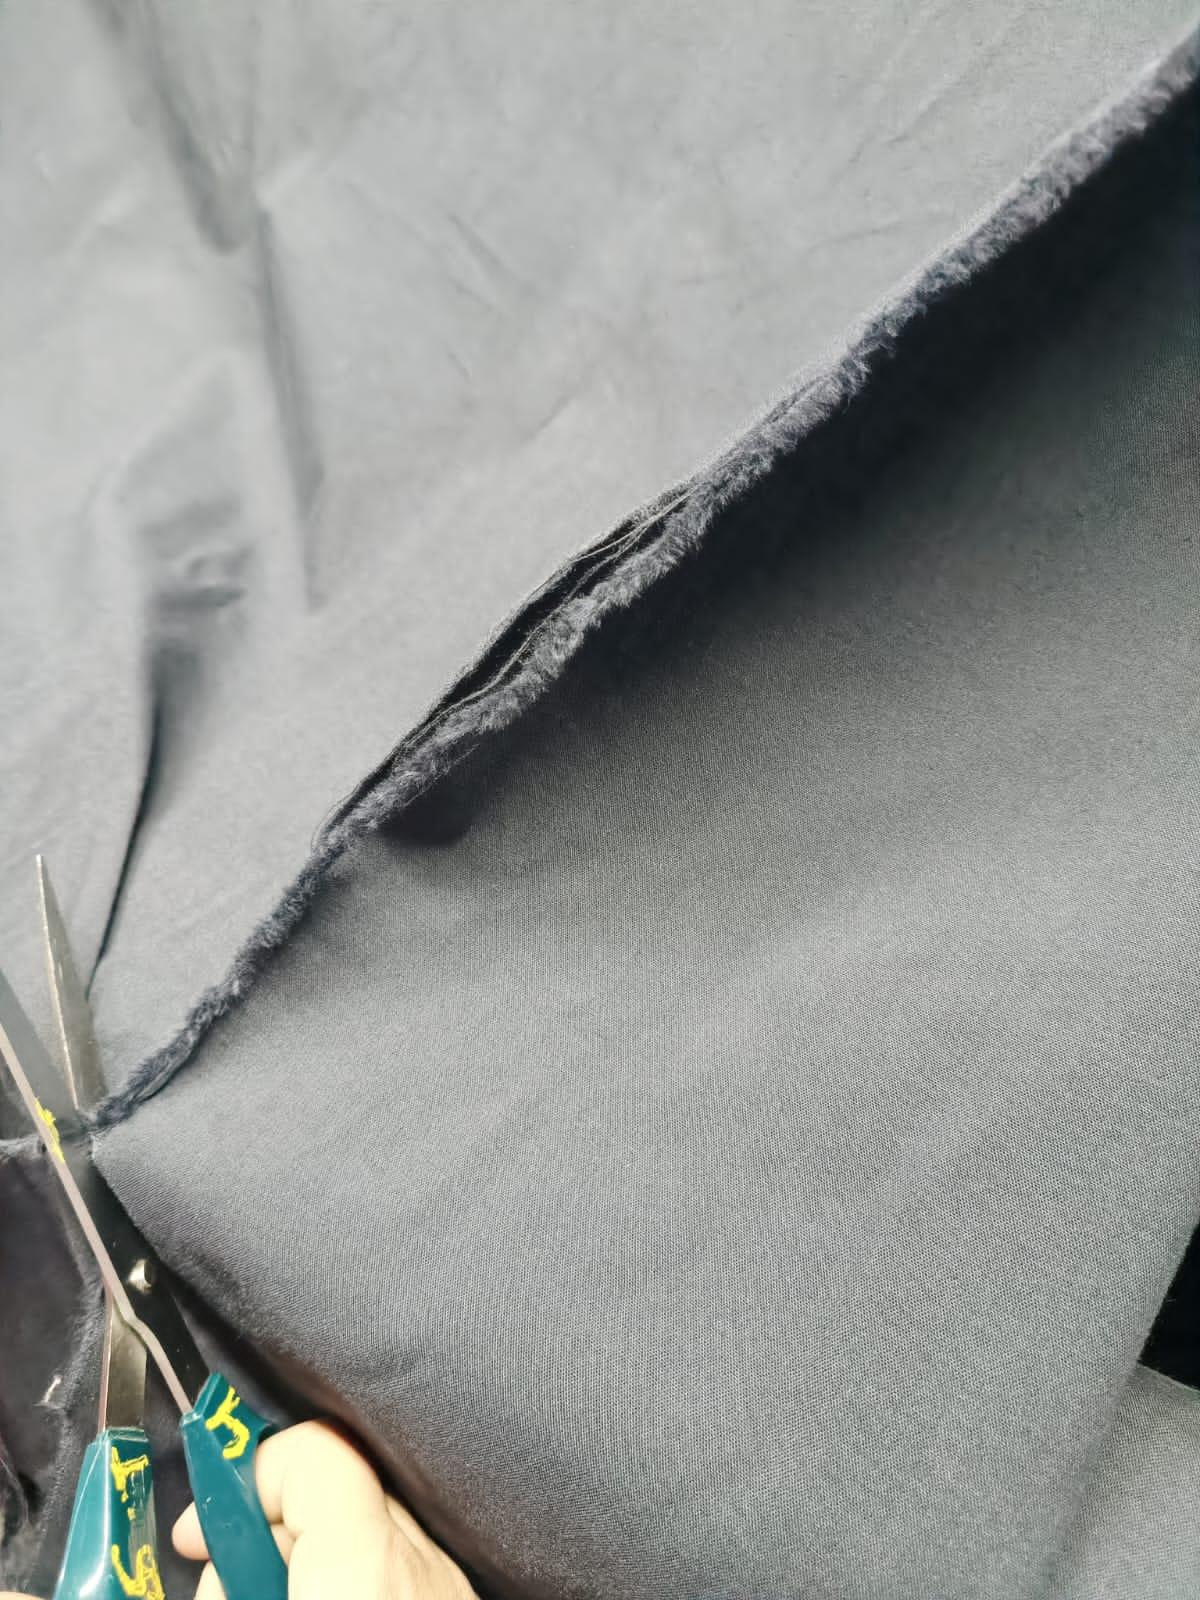

In [63]:
img_file = drive.get('1689357575.939281').read()
Image(img_file)

In [49]:
img_file

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\x06\x06\x06\x06\x07\x06\x07\x08\x08\x07\n\x0b\n\x0b\n\x0f\x0e\x0c\x0c\x0e\x0f\x16\x10\x11\x10\x11\x10\x16"\x15\x19\x15\x15\x19\x15"\x1e$\x1e\x1c\x1e$\x1e6*&&*6>424>LDDL_Z_||\xa7\x01\x06\x06\x06\x06\x07\x06\x07\x08\x08\x07\n\x0b\n\x0b\n\x0f\x0e\x0c\x0c\x0e\x0f\x16\x10\x11\x10\x11\x10\x16"\x15\x19\x15\x15\x19\x15"\x1e$\x1e\x1c\x1e$\x1e6*&&*6>424>LDDL_Z_||\xa7\xff\xc2\x00\x11\x08\x05\x00\x03\xc0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00.\x00\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x02\xfaV]\xe5(\x10\xb0\x00\xb0*P\x90\xd34\xa9H\xa2*\xa2\x88\xa2-3l\x05$\xd0\xcd\xa24L42\xd0\xcbP\x8a#P\xcbC6\x89`\x01(\x92\xda\xcbH\xcc\xd0\xcc\xd4\x10-\xc8\xd5\x80\x80\x00\x12\xca\x8dS\x15\x84\xb9\xb4\xcd\xb4\xcbt\xc5\xde\x8ckQl\xe7\x

In [31]:
db.get('1689421467.187619')

{'Article': '150208-BAMM-CT-SF',
 'Customer': 'Aditya birla',
 'Date': '15-07-2023',
 'Defect_type': 'Patta, ',
 'PO': 'F010225562',
 'Quantity': 2800,
 'Remarks': 'Proceeded for further processing.',
 'key': '1689421467.187619'}

In [33]:
db.get('1689421467.187619')['Remarks']

'Proceeded for further processing.'

In [20]:
# db.update({'Article': '150208-BAMM-CT-SF'}, '1689421467.187619')

In [34]:
# Code from: https://stackoverflow.com/questions/18491416/pil-convert-bytearray-to-image
import os
import io
import PIL.Image as pilmage

from array import array

def readimage(path):
    count = os.stat(path).st_size / 2
    with open(path, "rb") as f:
        return bytearray(f.read())

# bytes = readimage(path+extension)
# image = Image.open(io.BytesIO(bytes))
# image.save(savepath)

C:\Users\sinch\AppData\Local\Temp\ipykernel_3916\1533958038.py:8: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  resize_new_img = new_img.resize((basewidth,hsize), pilmage.ANTIALIAS)


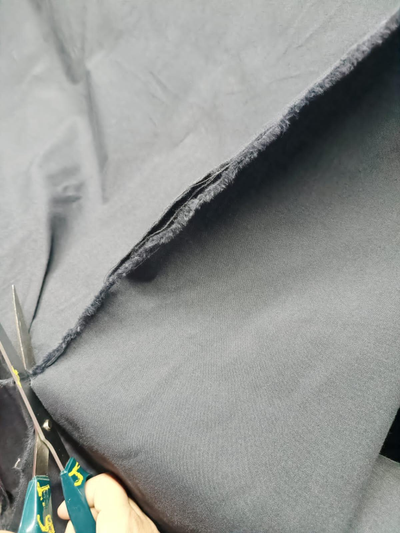

In [64]:
new_img = pilmage.open(io.BytesIO(drive.get('1689357575.939281').read()))
# set the base width of the result
basewidth = 400
# determining the height ratio
wpercent = (basewidth/float(new_img.size[0]))
hsize = int((float(new_img.size[1])*float(wpercent)))
# resize image and save
resize_new_img = new_img.resize((basewidth,hsize), pilmage.ANTIALIAS)
resize_new_img.save('new_img.jpg')
resize_new_img

In [65]:
image2 = pilmage.open(io.BytesIO(drive.get('1689357575.939281').read()))
image2.save('raw_img.jpg')

In [37]:
# for i,k in enumerate(drive.list()['names']):
#     print(k)
#     img_ = drive.get(k).read()
#     img_read = Image(img_)
#     img_decode = pilmage.open(io.BytesIO(img_read.data))
#     img_decode.save(f'.\{k}.jpg')
#     print('image saved!')

1688972072.392902
image saved!
1688983695.886027
image saved!
1689180871.386151
image saved!
1689219420.278607
image saved!
1689244421.484224
image saved!
1689316794.047651
image saved!


In [38]:
df.to_csv("expense_tracker_app/ignore/all_defects.csv", index=False)

In [40]:
df2 = pd.read_csv("expense_tracker_app/ignore/all_defects.csv")
df2

,Article,Customer,Date,Defect_type,PO,Quantity,Remarks,key
0,A121A041,Uniqlo,10-07-2023,Leno break,F010225085,2442,Tight leno on both sides. Updated to MSML - Go...,1.689358e+09
1,A140F896,Aathava,10-07-2023,Droppings,"FMW0003706, F010225309",8600,Updated to MSML. Rolls sent back.,1.689358e+09
2,A121A041,Uniqlo,12-07-2023,"Lining,",F010225216,2886,Piece to piece warp lining observed.,1.689358e+09
3,15001021,Raymond Ltd,13-07-2023,S-bowing+Skew,F0A0020764,1570,1.Fabric processed in stenter(2times) = No imp...,1.689358e+09
4,A160C084,Indian Terrain,13-07-2023,"Neps,",F0A0020853,8580,Neppy appearance in melange quality. Sent for ...,1.689358e+09
5,A150B321,Aditya Birla Fashion & Retail,14-07-2023,"Loops, Temple Impression",Wvg PO: 59406,3044,"Pre-intimation from MSML, to check final outco...",1.689358e+09
6,A145A438,Aditya birla,15-07-2023,Oil Stain,FMW0003716,2000,Oil Stain observed in full fabric. proceed for...,1.689421e+09
7,150208-BAMM-CT-SF,Aditya birla,15-07-2023,"Patta,",F010225562,2800,Proceeded for further processing.,1.689421e+09
